In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [9]:
#drop 2 unnecessary columns as adviced by dataset provider
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'] , axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

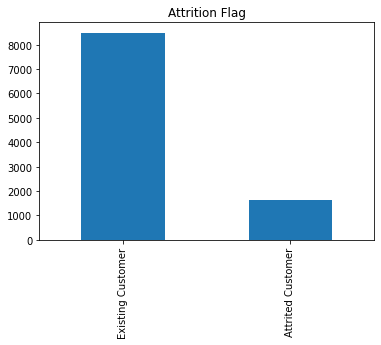

In [11]:
import matplotlib.pyplot as plt
df.Attrition_Flag.value_counts().plot(kind='bar')
plt.title('Attrition Flag')
plt.show()

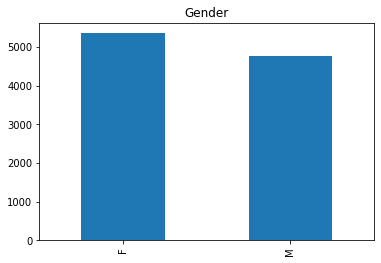

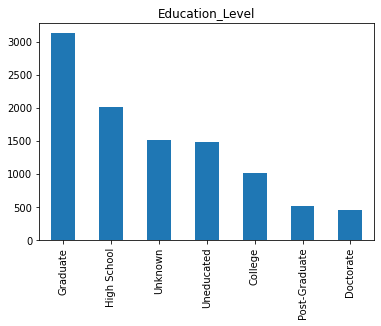

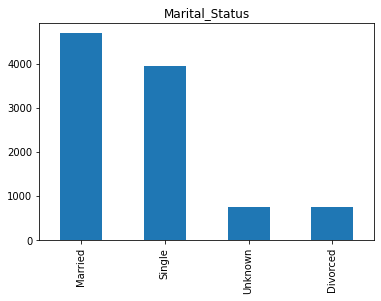

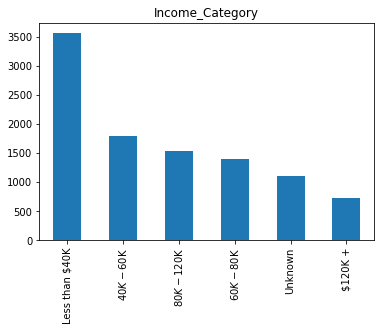

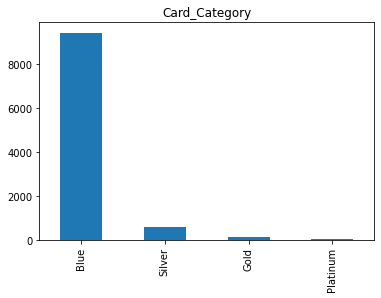

In [12]:
for var in ['Gender','Education_Level','Marital_Status','Income_Category', 'Card_Category']:
  df[var].value_counts().plot(kind='bar')
  plt.title(var)
  plt.show()

Pre-Processing Categorical Data

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labels = ['Attrition_Flag','Gender','Income_Category']
categories = ['Education_Level','Marital_Status','Card_Category']

le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [14]:
df[labels]=df[labels].apply(lambda x: le.fit_transform(x))

In [15]:
for cat in categories:
  cat_features = pd.DataFrame(ohe.fit_transform(df[[cat]]), columns = list([df[cat].unique()]))
  df = pd.concat([df, cat_features], axis=1)

In [16]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,"(High School,)","(Graduate,)","(Uneducated,)","(Unknown,)","(College,)","(Post-Graduate,)","(Doctorate,)","(Married,)","(Single,)","(Unknown,)","(Divorced,)","(Blue,)","(Gold,)","(Silver,)","(Platinum,)"
0,768805383,1,45,1,3,High School,Married,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,713982108,1,51,1,3,Graduate,Married,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,769911858,1,40,0,4,High School,Unknown,4,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,709106358,1,40,1,3,Uneducated,Married,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
df1=df.iloc[:, :24]
df2=df.iloc[:, 25:30]
df3=df.iloc[:, 31:]
df_final = pd.concat([df1, df2, df3], axis = 1)

In [19]:
df_final.columns

Index([               'CLIENTNUM',           'Attrition_Flag',
                   'Customer_Age',                   'Gender',
                'Dependent_count',          'Education_Level',
                 'Marital_Status',          'Income_Category',
                  'Card_Category',           'Months_on_book',
       'Total_Relationship_Count',   'Months_Inactive_12_mon',
          'Contacts_Count_12_mon',             'Credit_Limit',
            'Total_Revolving_Bal',          'Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1',          'Total_Trans_Amt',
                 'Total_Trans_Ct',      'Total_Ct_Chng_Q4_Q1',
          'Avg_Utilization_Ratio',           ('High School',),
                    ('Graduate',),            ('Uneducated',),
                     ('College',),         ('Post-Graduate',),
                   ('Doctorate',),               ('Married',),
                      ('Single',),              ('Divorced',),
                        ('Blue',),                  ('G

In [21]:
X = df_final.drop(columns=categories).drop(columns=['Attrition_Flag']).drop(columns=['CLIENTNUM'])
y = df_final['Attrition_Flag']
X.info()
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Income_Category           10127 non-null  int64  
 4   Months_on_book            10127 non-null  int64  
 5   Total_Relationship_Count  10127 non-null  int64  
 6   Months_Inactive_12_mon    10127 non-null  int64  
 7   Contacts_Count_12_mon     10127 non-null  int64  
 8   Credit_Limit              10127 non-null  float64
 9   Total_Revolving_Bal       10127 non-null  int64  
 10  Avg_Open_To_Buy           10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 12  Total_Trans_Amt           10127 non-null  int64  
 13  Total_Trans_Ct            10127 non-null  int64  
 14  Total_

(10127,)

Split Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=31)

In [24]:
#Define scoring metrics: Precision on class 0
from sklearn.metrics import recall_score, accuracy_score, make_scorer
custom_recall = make_scorer(recall_score, pos_label = 0)

Build model

In [25]:
#Build XGB model
from xgboost import XGBClassifier

In [26]:
Test_score = []
Train_score = []
n_estimators = [100,200,300,400,500,600,700,800,900,1000]

for n_est in n_estimators:
  xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=n_est)
  xgb.fit(X_train, y_train)
  y_train_pred = xgb.predict(X_train)
  Train_score.append(recall_score(y_train, y_train_pred, pos_label=0))
  y_test_pred = xgb.predict(X_test)
  Test_score.append(recall_score(y_test, y_test_pred, pos_label=0))

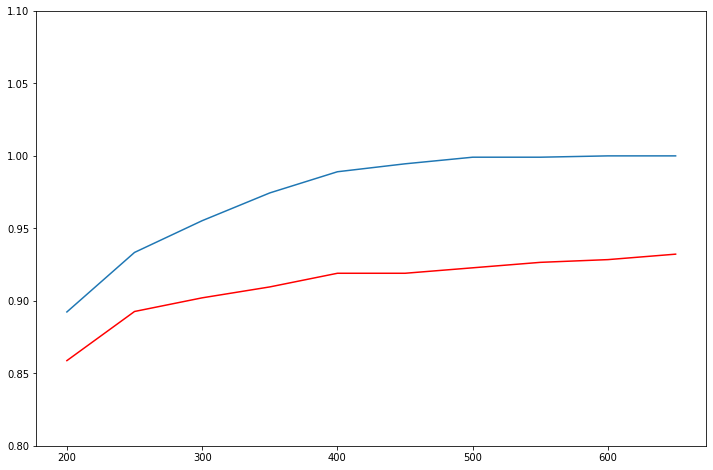

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(Train_score)
ax.plot(Test_score, c = 'red')
ax.set_xticklabels(n_estimators)
ax.set_ylim(0.8, 1.1)
plt.show()

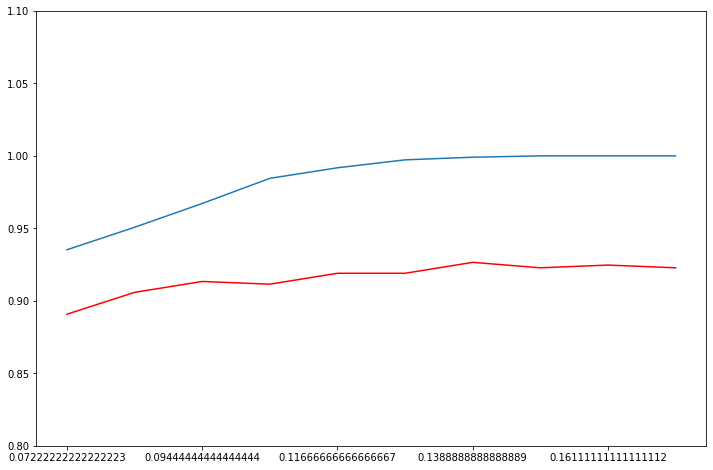

In [29]:
Test_score = []
Train_score = []
learning_rate = list(np.linspace(0.05, 0.25, 10))

for lr in learning_rate:
  xgb = XGBClassifier(objective='binary:logistic', learning_rate = lr, n_estimators = 400)
  xgb.fit(X_train, y_train)
  y_train_pred = xgb.predict(X_train)
  Train_score.append(recall_score(y_train, y_train_pred, pos_label=0))
  y_test_pred = xgb.predict(X_test)
  Test_score.append(recall_score(y_test, y_test_pred, pos_label=0))

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(Train_score)
ax.plot(Test_score, c = 'red')
ax.set_xticklabels(learning_rate)
ax.set_ylim(0.8,1.1)
plt.show()

In [30]:
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.1225, n_estimators=400)

Parameter tuning

In [31]:
#Build ParamsGrid
params = {
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.65, 0.8],
    'colsample_bytree':[0.1,0.4,0.7],
    'lambda':[0.3, 0.5, 0.7, 0.9]
}

In [32]:
#RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv=5, scoring=custom_recall, return_train_score=True)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1225,
                                           max_delta_step=0, max_depth=3,
                                           min_child_weight=1, missing=None,
                                           n_estimators=400, n_jobs=1,
                                           nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=

In [33]:
clf.best_params_

{'colsample_bytree': 0.7, 'lambda': 0.7, 'max_depth': 3, 'subsample': 0.8}

In [34]:
clf.cv_results_

{'mean_fit_time': array([0.7947772 , 1.97389212, 2.75962515, 0.94406934, 1.15334911,
        0.99673276, 2.01136904, 2.20705585, 0.83656306, 1.15093908]),
 'mean_score_time': array([0.0182219 , 0.03125801, 0.03104906, 0.02375984, 0.018467  ,
        0.029141  , 0.02476592, 0.02436624, 0.0182374 , 0.01844988]),
 'mean_test_score': array([0.78103362, 0.87864259, 0.87682026, 0.81023661, 0.86952677,
        0.81387298, 0.88503944, 0.8777252 , 0.77922374, 0.86952677]),
 'mean_train_score': array([0.852419  , 1.        , 1.        , 0.89986307, 0.93864097,
        0.9447991 , 0.9942977 , 0.99270135, 0.84010116, 0.93864097]),
 'param_colsample_bytree': masked_array(data=[0.1, 0.4, 0.7, 0.1, 0.4, 0.1, 0.7, 0.7, 0.1, 0.4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_lambda': masked_array(data=[0.9, 0.3, 0.7, 0.9, 0.5, 0.7, 0.7, 0.9, 0.3, 0.3],
              mask=[False,

Evaluation

In [35]:
y_test_pred = clf.best_estimator_.predict(X_test)

In [36]:
recall_score(y_test,y_test_pred, pos_label=0)

0.9020715630885122

In [37]:
accuracy_score(y_test,y_test_pred)

0.9721723518850988